## Quick Start ##

This notebook will step through some cool ways to work with your molecule database

One thing to note.  There are lots of ways to customize jupyter notebooks and the ipython kernel.  In this case, I am avoiding any of that awesome magic and instead I am writing out all the setup explicitly here in the notebook itself.  The only special config in the notebook_config.py file is to start the notebook in the 'notebooks' directory

In [1]:
import os
import sys
import django
import pprint
import pandas as pd

# setup the djhango settings file.  Change this to use the settings file that connects you to your desired database
os.environ["DJANGO_SETTINGS_MODULE"] = "djangochem.settings.postgres_docker"
# this must be run to setup access to the django settings and make database access work etc.
django.setup()

# import the models that you want to access
from pgmols.models import Mol, Calc, Geom
from jobs.models import Job, JobConfig

# this is all setup for the notebook
from IPython.display import HTML
import matplotlib
%matplotlib inline
from rdkit.Chem import AllChem as Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit.Chem import PandasTools # headsup: this import change the behavior of dataframes with mols in them
# some global configuration of the pandastools
PandasTools.molRepresentation = 'svg'
PandasTools.molSize = (200,200)


In [2]:
Mol.objects.count()

96

In [3]:
# this is a little helper function to render images inside a dataframe
# once again, there are ways to monkey patch the rendering of dataframes, but I am trying to 
# avoid most of that to make things a bit easier to understand

def show(df):
    return HTML(df.to_html(escape=False))

Now we can have some fun

In [4]:
# we will pull 9 molecules from our db.  (this is assuming you've already run a test molgen)
# the to_dict method of the Mol objects gives us an rdkit Mol objects, a smiles string, and the contents of the details json
mol_dicts = [m.to_dict() for m in Mol.objects.all()]
mol_dicts

[{'electron_count': 102,
  'mass': 196.074896256,
  'mol': <rdkit.Chem.rdchem.Mol at 0x1186b4e40>,
  'molecular_charge': 0,
  'smiles': 'c1ccc2cc(-c3nnn[nH]3)cc-2cc1',
  'stoichiometry': 'C11H8N4',
  'tags': []},
 {'electron_count': 348,
  'mass': 674.2151867040001,
  'mol': <rdkit.Chem.rdchem.Mol at 0x1187f54e0>,
  'molecular_charge': 0,
  'smiles': 'c1cc(-c2cc(-c3ccncn3)c(-c3ccncn3)c3c(-c4ccncn4)c(-c4ccncn4)c(-c4ccncn4)c-3c2-c2ccncn2)ncn1',
  'stoichiometry': 'C38H22N14',
  'tags': []},
 {'electron_count': 108,
  'mass': 205.089149352,
  'mol': <rdkit.Chem.rdchem.Mol at 0x1188f3030>,
  'molecular_charge': 0,
  'smiles': 'c1ccc2cc(-c3cccnc3)cc-2cc1',
  'stoichiometry': 'C15H11N',
  'tags': []},
 {'electron_count': 124,
  'mass': 226.172150704,
  'mol': <rdkit.Chem.rdchem.Mol at 0x11890a8f0>,
  'molecular_charge': 0,
  'smiles': 'Cc1cc(C)c(C)c2c(C)c(C)c(C)c-2c1C',
  'stoichiometry': 'C17H22',
  'tags': []},
 {'electron_count': 108,
  'mass': 205.089149352,
  'mol': <rdkit.Chem.rdchem.M

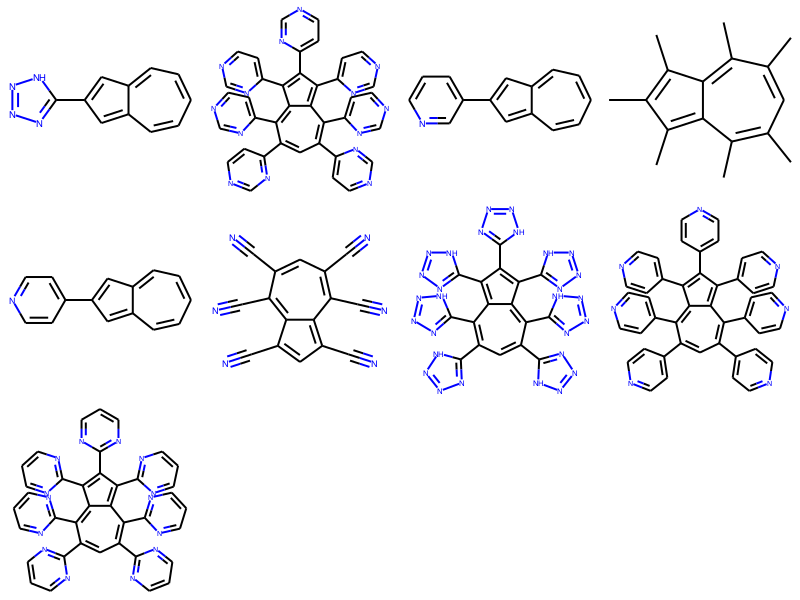

In [6]:
# builtin rdkit tools to view mols
Draw.MolsToGridImage([m['mol'] for m in mol_dicts[0:9]], molsPerRow=4)

In [8]:
# we can make a pandas dataframe directly from the list of dicts
df = pd.DataFrame(mol_dicts)
# specify the columns you want to see
cols = ['mol', 'mass', 'stoichiometry']
show(df[cols][0:9])  # show is defined at top of notebook

In [6]:
# and once we are in a dataframe, we get csv output for free!
csvcols = ['smiles', 'mass', 'stoichiometry']
df[csvcols].to_csv('output.csv')